<a href="https://colab.research.google.com/github/MachineSaver/MachineSaver/blob/main/Machine_Saver_Web_Portal_API_Integration_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Saver Web Portal Integration Examples

[Read the API Documentation](https://www.bipom.com/documents/WiPOM/WiPORTAL%20API.pdf)

In [1]:
from typing import Optional, List, Dict
import pandas as pd
import requests
from typing import List, Dict, Union, Optional, Tuple, Any
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import logging
from datetime import datetime, timedelta
import numpy as np

# Get Your Authorization Token

In [2]:
def get_auth_token(username: str, password: str) -> str:
  """Login to Machine Saver API and retrieve access token."""
  url = "https://api.portal.machinesaver.com/v1/Login"
  data = {
      'grant_type': 'password',
      'username': username,  # Replace with actual username
      'password': password   # Replace with actual password
  }

  response = requests.post(url, data=data)

  if response.status_code == 200:
      token_data = response.json()
      access_token = token_data.get('access_token')
      return access_token
  else:
      print(f"Failed to login: {response.status_code} - {response.text}")
      return None

In [3]:
access_token = get_auth_token('Generic_Demo', 'Nf!Ut9gCTPhaUv')

In [4]:
print(access_token)

5AhP11jfMzYV4j_qD1rduITH3_t6vnGf64E4eBM1oQaOOzsb5_SNtyBlJQXLFtuLWIfD3tKkmA2PQkSEYP3mx_IfpRnMFuxIHV0FMwm4FDxGlir3x13P9EFl0MLhXYYlyy-jvtqHnQFSSvlxnDODwNG_BnsjxVhQHGvWF87D-4IthknzunTTApw6XdltkNAWsxCqIcFjB0nGwcgF9g4j3YtZYdLdiv-tEX1yfaqaMY_KUyf51_tD6iL5kJCkgNyBWQkRF6lC_V3Rn6R5pdkw9B7PGxWllTkdZ9g5arcPRy-75k8Hguzket7ldT1Jyt1cZIlgx8vC_MAzObucLPfwwGrRLx8PdIOPvMejiMYpj49xHn9wUwvrTMsBW4-Z4I0mSYcJMgfr-jirIuS2tZ7bBNMZCbk


# Get Accounts List

In [5]:
def get_accounts_list(access_token: str) -> dict:
    """Get accounts list from Machine Saver API."""
    url = "https://api.portal.machinesaver.com/v1/AccountsList"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch accounts: {response.status_code} - {response.text}")
        return None

In [6]:
account_list = get_accounts_list(access_token)

In [7]:
# Convert to DataFrame
df = pd.DataFrame(account_list)
df

""


# Get Device List

In [8]:
def get_devices_list(access_token: str) -> dict:
    """Get devices list from Machine Saver API."""
    url = "https://api.portal.machinesaver.com/v1/DevicesList"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch devices list: {response.status_code} - {response.text}")
        return None

In [9]:
device_list = get_devices_list(access_token)

In [10]:
# Convert to DataFrame
df = pd.DataFrame(device_list)
df

,Id,AccountId,Serial,IsActive,IPAddress,CreateAt,CreatedbyUser,IsCGVtbCom,DeviceName
0,1186,441,KM4AKB5650,True,10.11.0.76;166.168.196.140,2024-02-06T04:55:18.884,28,False,Cloudgate Mini
1,1229,441,KM4AP5A988,True,10.11.0.210;166.146.188.63,2024-08-13T17:18:19.967,110,False,Cloudgate Mini
2,1262,441,KM4AL9G691,True,10.11.0.37;166.168.196.136,2025-02-27T17:47:31.954,110,False,Cloudgate Mini


# Get Sensor List Using Gateway ID

In [11]:
def get_sensors_list(device_id: int, access_token: str) -> dict:
    """Get sensors list for a specific device from Machine Saver API."""
    url = f"https://api.portal.machinesaver.com/v1/SensorsList?deviceId={device_id}"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch sensor data: {response.status_code} - {response.text}")
        return None

In [12]:
sensor_list = get_sensors_list(1262, access_token)

In [13]:
# Convert to DataFrame
df = pd.DataFrame(sensor_list)
df

,DeviceId,AccountId,Type,Tags,SensorName,RTU,DevuceEUI
0,1262,10618,AIRVIBE,"[{'Id': 1140368, 'IsActive': True, 'DeviceId':...",Sensor 8C1F642113000075,1,8C1F642113000075
1,1262,10618,AIRVIBE,"[{'Id': 1140380, 'IsActive': True, 'DeviceId':...",Sensor 8C1F642113000076,1,8C1F642113000076
2,1262,10618,AIRVIBE,"[{'Id': 1140392, 'IsActive': True, 'DeviceId':...",Sensor 8C1F642113000085,1,8C1F642113000085
3,1262,10618,AIRVIBE,"[{'Id': 1140404, 'IsActive': True, 'DeviceId':...",Sensor 8C1F642113000087,1,8C1F642113000087
4,1262,10618,AIRVIBE,"[{'Id': 1140416, 'IsActive': True, 'DeviceId':...",Sensor 8C1F642113000092,1,8C1F642113000092
5,1262,10618,AIRVIBE,"[{'Id': 1140428, 'IsActive': True, 'DeviceId':...",Sensor 8C1F642113000095,1,8C1F642113000095
6,1262,10618,AIRVIBE,"[{'Id': 1140440, 'IsActive': True, 'DeviceId':...",Sensor 8C1F642113000097,1,8C1F642113000097
7,1262,10618,AIRVIBE,"[{'Id': 1140452, 'IsActive': True, 'DeviceId':...",Sensor 8C1F642113000098,1,8C1F642113000098
8,1262,10618,AIRVIBE,"[{'Id': 1140464, 'IsActive': True, 'DeviceId':...",Sensor 8C1F642113000099,1,8C1F642113000099
9,1262,10618,AIRVIBE,"[{'Id': 1140476, 'IsActive': True, 'DeviceId':...",Sensor 8C1F642113000118,1,8C1F642113000118


# Get Data Tags Using Device ID

In [14]:
def get_tags_list(device_id: int, access_token: str) -> dict:
    """Get tags list for a specific device from Machine Saver API."""
    url = f"https://api.portal.machinesaver.com/v1/TagsList?deviceId={device_id}"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch tag list: {response.status_code} - {response.text}")
        return None

In [15]:
tag_list = get_tags_list(1262, access_token)

In [16]:
# Convert to DataFrame
df = pd.DataFrame(tag_list)
df

,Id,IsActive,DeviceId,Name,Type,Address,VirtualAddress,Units1,Units2,LogPeriod,...,MBType,MBAddress,MBValueType,MBValueByteOrder,IsVMapEnabled,IsBMapEnabled,VMapPresent,BMapPresent,MaxLoggedAt,RecordsNumber
0,1140368,True,1262,8C1F642113000075 - Acceleration Axis 1,DS,0,0,g,,0,...,None,0,None,None,False,False,False,False,None,0
1,1140369,True,1262,8C1F642113000075 - Acceleration Axis 2,DS,0,0,g,,0,...,None,0,None,None,False,False,False,False,None,0
2,1140370,True,1262,8C1F642113000075 - Acceleration Axis 3,DS,0,0,g,,0,...,None,0,None,None,False,False,False,False,None,0
3,1140371,True,1262,8C1F642113000075 - Temperature,HR,40200,0,C,,60,...,None,0,None,None,False,False,False,False,2025-04-28T15:28:51.000,13873
4,1140372,True,1262,8C1F642113000075 - Battery,HR,40202,0,%%,,60,...,None,0,None,None,False,False,False,False,2025-04-28T15:28:51.000,13948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1140537,True,1262,8C1F642113000393 - Acceleration Axis 3 (RMS),HR,40206,0,g,,60,...,None,0,None,None,False,False,False,False,2025-04-28T15:26:31.000,1384
152,1140538,True,1262,8C1F642113000393 - Velocity Axis 1 (RMS),HR,40207,0,ips,,60,...,None,0,None,None,False,False,False,False,2025-04-28T15:26:31.000,1388
153,1140539,True,1262,8C1F642113000393 - Velocity Axis 2 (RMS),HR,40208,0,ips,,60,...,None,0,None,None,False,False,False,False,2025-04-28T15:26:31.000,1395
154,1140540,True,1262,8C1F642113000393 - Velocity Axis 3 (RMS),HR,40209,0,ips,,60,...,None,0,None,None,False,False,False,False,2025-04-28T15:26:31.000,1398


In [17]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Helper function to format display names
def format_tag_display(tag):
    return f"{tag['Id']} {tag['Name']} ({tag['Type']}, {tag['Units1']}, Records: {tag['RecordsNumber']})"

# Create the SelectMultiple widget
options = [(format_tag_display(tag), tag) for tag in tag_list]
multi_select_widget = widgets.SelectMultiple(
    options=options,
    description="Tags",
    rows=10,
    layout=widgets.Layout(width='80%')
)

# Create a button to submit the selection
submit_button = widgets.Button(description="Select Tags")
output = widgets.Output()

# Store the selected tags
selected_tags = []

def on_submit_click(b):
    global selected_tags
    with output:
        clear_output()  # Clear previous outputs
        selected_tags = list(multi_select_widget.value)
        if selected_tags:
            print("Selected Tags:")
            for tag in selected_tags:
                print(format_tag_display(tag))
        else:
            print("No tags selected.")

# Attach the button click event
submit_button.on_click(on_submit_click)

# Display the widgets
display(multi_select_widget, submit_button, output)


SelectMultiple(description='Tags', layout=Layout(width='80%'), options=(('1140368 8C1F642113000075 - Accelerat…

Button(description='Select Tags', style=ButtonStyle())

Output()

In [18]:
tag_list = get_tags_list(1262, access_token)

In [19]:
print(tag_list)

[{'Id': 1140368, 'IsActive': True, 'DeviceId': 1262, 'Name': '8C1F642113000075 - Acceleration Axis 1', 'Type': 'DS', 'Address': 0, 'VirtualAddress': 0, 'Units1': 'g', 'Units2': '', 'LogPeriod': 0, 'MBRtu': 0, 'MBType': None, 'MBAddress': 0, 'MBValueType': None, 'MBValueByteOrder': None, 'IsVMapEnabled': False, 'IsBMapEnabled': False, 'VMapPresent': False, 'BMapPresent': False, 'MaxLoggedAt': None, 'RecordsNumber': 0}, {'Id': 1140369, 'IsActive': True, 'DeviceId': 1262, 'Name': '8C1F642113000075 - Acceleration Axis 2', 'Type': 'DS', 'Address': 0, 'VirtualAddress': 0, 'Units1': 'g', 'Units2': '', 'LogPeriod': 0, 'MBRtu': 0, 'MBType': None, 'MBAddress': 0, 'MBValueType': None, 'MBValueByteOrder': None, 'IsVMapEnabled': False, 'IsBMapEnabled': False, 'VMapPresent': False, 'BMapPresent': False, 'MaxLoggedAt': None, 'RecordsNumber': 0}, {'Id': 1140370, 'IsActive': True, 'DeviceId': 1262, 'Name': '8C1F642113000075 - Acceleration Axis 3', 'Type': 'DS', 'Address': 0, 'VirtualAddress': 0, 'Units

# Get Tag Information

Notes on the data below for the AirVibe Sensor:

Values that end in (RMS) and are of the type "HOLD" are the overall vibration data, which is typically used by operators to indicate that there is a problem an increased vibration, this is what is trended when we [Plot Tag Data](https://colab.research.google.com/github/MachineSaver/MachineSaver/blob/main/Machine_Saver_Web_Portal_API_Integration_Examples.ipynb#scrollTo=lLy-64d0vIXq&line=6&uniqifier=1)

Values that do not end in (RMS) and are of the type "DS" are the analysis vibration data (aka waveform, aka spectra), which is typically used by a vibration analyst or anomaly detection algorithm to tell you more specifically which component of a machine has increased vibration (such as a bearing) this is what is used when we [Plot Snapshot Data](https://colab.research.google.com/github/MachineSaver/MachineSaver/blob/main/Machine_Saver_Web_Portal_API_Integration_Examples.ipynb#scrollTo=rqbjauvmoDu-&line=23&uniqifier=1)

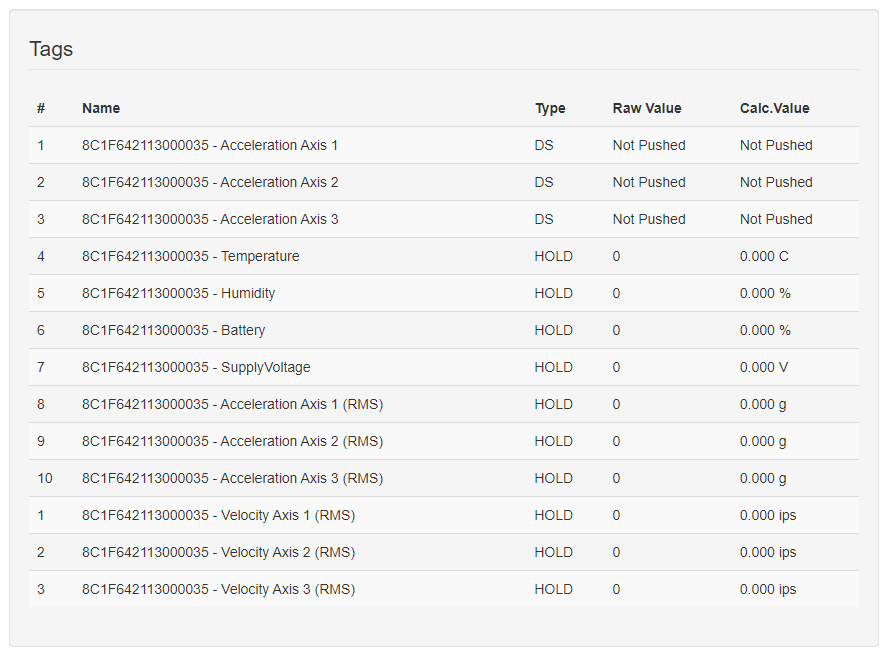

In [20]:
def get_tag_info(tag_id: int, access_token: str) -> dict:
    """Get tag information from Machine Saver API."""
    url = f"https://api.portal.machinesaver.com/v1/TagInfo"
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'Id': tag_id}

    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return None

In [21]:
tag_info = get_tag_info(1136766, access_token)

In [22]:
print(tag_info)

{'Id': 1136766, 'IsActive': True, 'DeviceId': 1262, 'Name': '8C1F642113000141 - Acceleration Axis 1 (RMS)', 'Type': 'HR', 'Address': 40204, 'VirtualAddress': 0, 'Units1': 'g', 'Units2': '', 'LogPeriod': 60, 'MBRtu': 0, 'MBType': None, 'MBAddress': 0, 'MBValueType': None, 'MBValueByteOrder': None, 'IsVMapEnabled': False, 'IsBMapEnabled': False, 'VMapPresent': False, 'BMapPresent': False, 'MaxLoggedAt': '2025-04-28T15:24:51.000', 'RecordsNumber': 25440}


# Get Tag Data From a Specific Time

In [23]:
def get_tag_data(
    tag_id: int,
    access_token: str,
    start_time: Optional[str] = None,
    end_time: Optional[str] = None
) -> Optional[List[Dict]]:
    """
    Fetch tag data from the Machine Saver API.

    If `start_time` or `end_time` are not provided, they default to 24 hours ago and
    1 minute in the future (UTC), respectively. The datetime strings are formatted as:
    "mm-dd-yyyyTHH:MM:SS" (note the 'T' separating the date and time).

    Args:
        tag_id (int): The identifier for the tag.
        access_token (str): The API access token.
        start_time (Optional[str]): The start time in the format "mm-dd-yyyyTHH:MM:SS".
            Defaults to 24 hours ago if not provided.
        end_time (Optional[str]): The end time in the format "mm-dd-yyyyTHH:MM:SS".
            Defaults to 1 minute in the future if not provided.

    Returns:
        Optional[List[Dict]]: The JSON response from the API parsed as a list of dictionaries,
        or None if an error occurred.
    """
    base_url = "https://api.portal.machinesaver.com/v1/TagData"
    headers = {
        'Authorization': f'Bearer {access_token}'  # Ensure a space after 'Bearer'
    }

    # Use UTC time for default calculations.
    now = datetime.utcnow()

    # Prepare default times if not provided.
    if start_time is None:
        default_start = now - timedelta(days=1)
        start_time = default_start.strftime("%m-%d-%YT%H:%M:%S")

    if end_time is None:
        default_end = now + timedelta(minutes=1)
        end_time = default_end.strftime("%m-%d-%YT%H:%M:%S")

    # Build the query parameters.
    params = {
        'tagId': tag_id,
        'startTime': start_time,
        'endTime': end_time,
    }

    try:
        response = requests.get(base_url, headers=headers, params=params)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        # Optionally, replace print with logging.error(...) in production code.
        error_response = getattr(e, 'response', None)
        error_details = f" {error_response.status_code} - {error_response.text}" if error_response else ""
        print(f"Error fetching tag data: {e}{error_details}")
        return None


In [24]:
tag_data = get_tag_data(tag_id=1136766, access_token=access_token)

In [25]:
print(tag_data)

[{'Id': 3296320, 'LogId': 1745904371, 'LoggedAt': '2025-04-27T20:34:57.000', 'RawValue': 4.0, 'CalcValue': 0.004, 'TextValue': None}, {'Id': 3308013, 'LogId': 1745905262, 'LoggedAt': '2025-04-27T20:49:57.000', 'RawValue': 4.0, 'CalcValue': 0.004, 'TextValue': None}, {'Id': 3316286, 'LogId': 1745905586, 'LoggedAt': '2025-04-27T20:54:57.000', 'RawValue': 4.0, 'CalcValue': 0.004, 'TextValue': None}, {'Id': 3320139, 'LogId': 1745905928, 'LoggedAt': '2025-04-27T20:59:57.000', 'RawValue': 4.0, 'CalcValue': 0.004, 'TextValue': None}, {'Id': 3327564, 'LogId': 1745906567, 'LoggedAt': '2025-04-27T21:09:57.000', 'RawValue': 4.0, 'CalcValue': 0.004, 'TextValue': None}, {'Id': 3331855, 'LogId': 1745906882, 'LoggedAt': '2025-04-27T21:14:57.000', 'RawValue': 4.0, 'CalcValue': 0.004, 'TextValue': None}, {'Id': 3335550, 'LogId': 1745907215, 'LoggedAt': '2025-04-27T21:19:57.000', 'RawValue': 4.0, 'CalcValue': 0.004, 'TextValue': None}, {'Id': 3343694, 'LogId': 1745907548, 'LoggedAt': '2025-04-27T21:24:5

# Plot Tag Data

In [26]:
# =============================================================================
# Plotly Theme Setup
# =============================================================================

def set_machine_saver_theme() -> None:
    """
    Configure the Plotly theme to include a watermark for Machine Saver Inc.

    This function sets up a custom template that adds a semi-transparent watermark
    and applies a dark theme combined with the custom template.
    """
    # Define a custom template with a watermark annotation.
    watermark_template = go.layout.Template(
        layout_annotations=[
            dict(
                name="draft watermark",
                text="Machine Saver Inc.",
                textangle=-30,
                opacity=0.1,
                font=dict(color="white", size=50),
                xref="paper",
                yref="paper",
                x=0.5,
                y=0.5,
                showarrow=True,
            )
        ]
    )
    pio.templates["draft"] = watermark_template
    pio.templates.default = "plotly_dark+draft"


# =============================================================================
# Helper Functions for Trace and Measurement Determination
# =============================================================================

def get_trace_color(name: str) -> str:
    """
    Determine the color for a trace based on its name.

    The function checks for specific axis identifiers within the trace name
    and returns a corresponding hex color code.

    Args:
        name (str): The name of the trace that may contain axis information.

    Returns:
        str: The hex color code assigned to the trace.
    """
    name_lower = name.lower()
    if "axis 1" in name_lower:
        return "#4CC9FE"
    elif "axis 2" in name_lower:
        return "#FFF100"
    elif "axis 3" in name_lower:
        return "#D91656"
    return "#808080"  # Default color if no match is found


def get_measurement_type(tag_name: str) -> Optional[str]:
    """
    Determine the measurement type based on the tag name.

    This function searches for specific keywords in the tag name to classify
    the measurement type.

    Args:
        tag_name (str): The name of the tag.

    Returns:
        Optional[str]: The measurement type ('velocity', 'acceleration', 'temperature')
                       if a match is found; otherwise, None.
    """
    tag_name_lower = tag_name.lower()
    if "velocity" in tag_name_lower:
        return "velocity"
    elif "acceleration" in tag_name_lower:
        return "acceleration"
    elif "temperature" in tag_name_lower:
        return "temperature"
    return None


# =============================================================================
# Data Fetching and Processing
# =============================================================================

def fetch_and_process_data(
    tag_ids: Union[int, List[int]],
    access_token: str,
    start_time: Optional[str] = None,
    end_time: Optional[str] = None
) -> Dict[str, List[Tuple[str, pd.DataFrame]]]:
    """
    Fetch and process data for one or multiple tags, grouping by measurement type.

    For each tag ID provided, this function retrieves the tag information and
    corresponding data. It then converts the data into a Pandas DataFrame (with
    properly parsed timestamps) and groups the data by measurement type.

    Args:
        tag_ids (Union[int, List[int]]): A single tag ID or a list of tag IDs.
        access_token (str): The API access token.
        start_time (Optional[str]): The optional start time for the data range.
        end_time (Optional[str]): The optional end time for the data range.

    Returns:
        Dict[str, List[Tuple[str, pd.DataFrame]]]: A dictionary mapping each measurement
        type to a list of tuples. Each tuple contains the tag name and its associated
        DataFrame.
    """
    # Ensure tag_ids is a list.
    if isinstance(tag_ids, int):
        tag_ids = [tag_ids]

    grouped_data: Dict[str, List[Tuple[str, pd.DataFrame]]] = {}

    for tag_id in tag_ids:
        # Retrieve tag info (assumes get_tag_info is defined elsewhere).
        tag_info = get_tag_info(tag_id, access_token)
        if not tag_info:
            continue

        tag_name = tag_info.get('Name')
        measurement_type = get_measurement_type(tag_name)
        if not measurement_type:
            continue

        # Fetch tag data (assumes get_tag_data is defined elsewhere).
        raw_data = get_tag_data(tag_id, access_token, start_time, end_time)
        if not raw_data:
            continue

        # Convert raw data into a DataFrame and parse the timestamp column.
        df = pd.DataFrame(raw_data)
        df['LoggedAt'] = pd.to_datetime(df['LoggedAt'])

        # Append the data to the grouped data dictionary.
        grouped_data.setdefault(measurement_type, []).append((tag_name, df))

    return grouped_data


# =============================================================================
# Plot Creation
# =============================================================================

def create_measurement_plots(
    tag_ids: Union[int, List[int]],
    access_token: str,
    start_time: Optional[str] = None,
    end_time: Optional[str] = None
) -> List[go.Figure]:
    """
    Create Plotly time-series plots for each measurement type.

    For each measurement group (e.g., velocity, acceleration, temperature),
    a separate figure is created with individual traces for each tag.

    Args:
        tag_ids (Union[int, List[int]]): A single tag ID or a list of tag IDs.
        access_token (str): The API access token.
        start_time (Optional[str]): The optional start time for the data range.
        end_time (Optional[str]): The optional end time for the data range.

    Returns:
        List[go.Figure]: A list of Plotly figures, one for each measurement type.
    """
    # Retrieve and group the data.
    grouped_data = fetch_and_process_data(tag_ids, access_token, start_time, end_time)
    figures: List[go.Figure] = []

    # Apply the custom Machine Saver theme.
    set_machine_saver_theme()

    # Generate a separate figure for each measurement type.
    for measurement_type, data_list in grouped_data.items():
        fig = go.Figure()

        # Add a trace for each tag in the current measurement group.
        for tag_name, df in data_list:
            fig.add_trace(
                go.Scatter(
                    x=df['LoggedAt'],
                    y=df['CalcValue'],
                    name=tag_name,
                    mode='lines',
                    line=dict(color=get_trace_color(tag_name)),
                    hovertemplate=(
                        f'{tag_name}<br>' +
                        'Time: %{x}<br>' +
                        'Value: %{y}<br><extra></extra>'
                    )
                )
            )

        # Configure the layout of the figure.
        fig.update_layout(
            title=f'{measurement_type.title()} Time Series',
            xaxis_title="Time",
            yaxis_title=f"{measurement_type.title()} Value",
            hovermode='x unified',
            showlegend=True,
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="left",
                x=0.01
            ),
            hoverlabel=dict(
                bgcolor="rgb(50, 50, 50)",
                font_size=16,
                font_family="Arial"
            ),
            plot_bgcolor='rgba(17, 17, 17, 0.9)',
            paper_bgcolor='rgba(17, 17, 17, 0.9)'
        )

        # Customize the grid and zero lines for both axes.
        fig.update_xaxes(gridcolor='rgba(128,128,128,0.2)', zeroline=True)
        fig.update_yaxes(gridcolor='rgba(128,128,128,0.2)', zeroline=True)

        figures.append(fig)

    return figures


In [27]:
tag_ids = [1136766, 1136767, 1136768, 1136769, 1136770, 1136771, 1136772, 1136773, 1136774, 1136775]  # Replace with actual tag IDs Starting with Acceleration Axis 1 (RMS) for the preferred sensor.

# Create plots for all measurement types
figures = create_measurement_plots(tag_ids, access_token)

# Display each figure
for fig in figures:
    fig.show()

# Get List of Data Snapshots by Device ID

In [28]:
def get_data_snapshots_list(device_id: int, access_token: str) -> dict:
    """Get data snapshots list for a specific device from Machine Saver API."""
    url = f"https://api.portal.machinesaver.com/v1/DatasnapshotsList?deviceId={device_id}"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch data snapshot list: {response.status_code} - {response.text}")
        return None

In [29]:
snapshot_list = get_data_snapshots_list(1262, access_token)

In [30]:
print(snapshot_list)

[{'Id': 33610, 'DeviceId': 1262, 'TagId': 1136087, 'Name': '8C1F642113000034 - Acceleration Axis 1', 'XUnits': 'us', 'YUnits': 'g', 'Timestamp': '03/03/2025 07:22:05', 'XData': 'double[2100]', 'YData': 'double[2100]'}, {'Id': 33611, 'DeviceId': 1262, 'TagId': 1136088, 'Name': '8C1F642113000034 - Acceleration Axis 2', 'XUnits': 'us', 'YUnits': 'g', 'Timestamp': '03/03/2025 07:22:05', 'XData': 'double[2100]', 'YData': 'double[2100]'}, {'Id': 33612, 'DeviceId': 1262, 'TagId': 1136089, 'Name': '8C1F642113000034 - Acceleration Axis 3', 'XUnits': 'us', 'YUnits': 'g', 'Timestamp': '03/03/2025 07:22:05', 'XData': 'double[2100]', 'YData': 'double[2100]'}, {'Id': 33650, 'DeviceId': 1262, 'TagId': 1136087, 'Name': '8C1F642113000034 - Acceleration Axis 1', 'XUnits': 'us', 'YUnits': 'g', 'Timestamp': '03/03/2025 17:42:03', 'XData': 'double[2100]', 'YData': 'double[2100]'}, {'Id': 33651, 'DeviceId': 1262, 'TagId': 1136088, 'Name': '8C1F642113000034 - Acceleration Axis 2', 'XUnits': 'us', 'YUnits': '

# Get Snapshot Data from a Snapshot ID

In [31]:
def get_data_snapshot_data(snapshot_id: int, access_token: str) -> dict:
    """Get data for a specific snapshot from Machine Saver API."""
    url = f"https://api.portal.machinesaver.com/v1/DatasnapshotData?Id={snapshot_id}"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch data snapshot: {response.status_code} - {response.text}")
        return None

In [32]:
snapshot_data = get_data_snapshot_data(33610, access_token)

In [33]:
print(snapshot_data)

{'Id': 33610, 'DeviceId': 1262, 'TagId': 1136087, 'Name': '8C1F642113000034 - Acceleration Axis 1', 'XUnits': 'us', 'YUnits': 'g', 'Timestamp': '03/03/2025 07:22:05', 'XData': [0.0, 70.0, 140.0, 210.0, 280.0, 350.0, 420.0, 490.0, 560.0, 630.0, 700.0, 770.0, 840.0, 910.0, 980.0, 1050.0, 1120.0, 1190.0, 1260.0, 1330.0, 1400.0, 1470.0, 1540.0, 1610.0, 1680.0, 1750.0, 1820.0, 1890.0, 1960.0, 2030.0, 2100.0, 2170.0, 2240.0, 2310.0, 2380.0, 2450.0, 2520.0, 2590.0, 2660.0, 2730.0, 2800.0, 2870.0, 2940.0, 3010.0, 3080.0, 3150.0, 3220.0, 3290.0, 3360.0, 3430.0, 3500.0, 3570.0, 3640.0, 3710.0, 3780.0, 3850.0, 3920.0, 3990.0, 4060.0, 4130.0, 4200.0, 4270.0, 4340.0, 4410.0, 4480.0, 4550.0, 4620.0, 4690.0, 4760.0, 4830.0, 4900.0, 4970.0, 5040.0, 5110.0, 5180.0, 5250.0, 5320.0, 5390.0, 5460.0, 5530.0, 5600.0, 5670.0, 5740.0, 5810.0, 5880.0, 5950.0, 6020.0, 6090.0, 6160.0, 6230.0, 6300.0, 6370.0, 6440.0, 6510.0, 6580.0, 6650.0, 6720.0, 6790.0, 6860.0, 6930.0, 7000.0, 7070.0, 7140.0, 7210.0, 7280.0, 7

# Grab Multiple Snapshots

In [34]:
def fetch_snapshot_data(snapshot_ids: Union[int, List[int]], access_token: str, base_url: str = "https://api.portal.machinesaver.com/v1") -> Dict[int, Any]:
  """
  Fetch data for one or multiple snapshot IDs.

  Args:
      snapshot_ids (Union[int, List[int]]): Single snapshot ID or list of snapshot IDs
      access_token (str): Authentication access token
      base_url (str): Base URL for the API

  Returns:
      Dict[int, Any]: Dictionary with snapshot IDs as keys and their corresponding data as values.
                      For successful requests, returns just the data.
                      For failed requests, returns error information.
  """
  # Convert single snapshot_id to list for consistent processing
  if isinstance(snapshot_ids, int):
      snapshot_ids = [snapshot_ids]

  # Set up headers for authentication
  headers = {
      'Authorization': f'Bearer {access_token}'
  }

  # Initialize results dictionary
  results = {}

  # Process each snapshot ID
  for snapshot_id in snapshot_ids:
      url = f"{base_url}/DatasnapshotData?Id={snapshot_id}"

      try:
          response = requests.get(url, headers=headers)
          response.raise_for_status()  # Raise exception for non-200 status codes

          # Store just the data portion for successful requests
          results[snapshot_id] = response.json()

      except requests.exceptions.RequestException as e:
          # Keep error information for failed requests
          results[snapshot_id] = {
              'error': str(e),
              'status_code': getattr(e.response, 'status_code', None),
              'response_text': getattr(e.response, 'text', None)
          }

  return results

In [35]:
snapshots = fetch_snapshot_data([85887, 85888, 85889], access_token)

In [36]:
print(snapshots)

{85887: {'Id': 85887, 'DeviceId': 1262, 'TagId': 1136761, 'Name': '8C1F642113000141 - Acceleration Axis 1', 'XUnits': 'us', 'YUnits': 'g', 'Timestamp': '04/01/2025 02:43:49', 'XData': [0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0, 950.0, 1000.0, 1050.0, 1100.0, 1150.0, 1200.0, 1250.0, 1300.0, 1350.0, 1400.0, 1450.0, 1500.0, 1550.0, 1600.0, 1650.0, 1700.0, 1750.0, 1800.0, 1850.0, 1900.0, 1950.0, 2000.0, 2050.0, 2100.0, 2150.0, 2200.0, 2250.0, 2300.0, 2350.0, 2400.0, 2450.0, 2500.0, 2550.0, 2600.0, 2650.0, 2700.0, 2750.0, 2800.0, 2850.0, 2900.0, 2950.0, 3000.0, 3050.0, 3100.0, 3150.0, 3200.0, 3250.0, 3300.0, 3350.0, 3400.0, 3450.0, 3500.0, 3550.0, 3600.0, 3650.0, 3700.0, 3750.0, 3800.0, 3850.0, 3900.0, 3950.0, 4000.0, 4050.0, 4100.0, 4150.0, 4200.0, 4250.0, 4300.0, 4350.0, 4400.0, 4450.0, 4500.0, 4550.0, 4600.0, 4650.0, 4700.0, 4750.0, 4800.0, 4850.0, 4900.0, 4950.0, 5000.0, 5050.0, 5100.0, 5150.0, 5200.0

# Plot Snapshot Data

In [37]:
def plot_generator(snapshot_data: Dict[int, Any]) -> go.Figure:
    """
    Generate 3-axis vibration analysis plots (time and frequency domain)
    from snapshot data.

    This function creates a Plotly figure with four subplots:
      - Acceleration vs Time
      - Acceleration FFT vs Frequency
      - Velocity vs Time
      - Velocity FFT vs Frequency

    The incoming snapshot data is expected to include the following keys:
      - 'XData': list of time samples in units specified by 'XUnits' (e.g. "us")
      - 'AccelData': time-domain acceleration data
      - 'AccelFFTData': FFT of the acceleration signal
      - 'VelocityData': time-domain velocity data
      - 'VelocityFFTData': FFT of the velocity signal
      - 'XUnits': unit for the XData (e.g., "us", "ms", "s")
      - 'YUnits': unit for the YData (e.g., "g" for acceleration)
      - 'DeviceId': the device identifier
      - 'Name': string that identifies the axis (e.g., "Acceleration Axis 1")

    For the time domain plots, the XData is converted into seconds using a unit
    conversion (e.g. microseconds to seconds). The FFT plots use a computed frequency
    axis in Hz based on the sampling rate derived from the time data.

    Args:
        snapshot_data (Dict[int, Any]): Dictionary keyed by snapshot IDs containing
            the snapshot data for various axes.

    Returns:
        go.Figure: A Plotly figure object with the vibration analysis plots.

    Raises:
        ValueError: If data for one or more required axes (Axis 1, Axis 2, or Axis 3)
                    is missing.
    """
    # Set up logging configuration.
    logging.basicConfig(level=logging.INFO)
    logger = logging.getLogger(__name__)

    # Define color schemes for each axis.
    COLORS: Dict[str, Dict[str, str]] = {
        'Axis 1': {
            'accel_waveform': '#4CC9FE',
            'accel_fft': '#4CC9FE',
            'vel_waveform': '#4CC9FE',
            'vel_fft': '#4CC9FE'
        },
        'Axis 2': {
            'accel_waveform': '#FFF100',
            'accel_fft': '#FFF100',
            'vel_waveform': '#FFF100',
            'vel_fft': '#FFF100'
        },
        'Axis 3': {
            'accel_waveform': '#D91656',
            'accel_fft': '#D91656',
            'vel_waveform': '#D91656',
            'vel_fft': '#D91656'
        }
    }

    def set_plotly_theme() -> None:
        """
        Apply a custom Plotly theme with a watermark.
        """
        watermark_template = go.layout.Template(
            layout_annotations=[
                dict(
                    name="draft watermark",
                    text="Machine Saver Inc.",
                    textangle=-30,
                    opacity=0.1,
                    font=dict(color="white", size=50),
                    xref="paper",
                    yref="paper",
                    x=0.5,
                    y=0.5,
                    showarrow=False
                )
            ]
        )
        pio.templates["draft"] = watermark_template
        pio.templates.default = "plotly_dark+draft"

    # Apply the custom Plotly theme.
    set_plotly_theme()

    # Initialize container for axis data.
    axis_data: Dict[str, Any] = {
        'Axis 1': None,
        'Axis 2': None,
        'Axis 3': None
    }
    device_id: Any = None
    x_units: str = ""
    y_units: str = ""

    # Process snapshots to assign data to each axis.
    for snapshot_id, data in snapshot_data.items():
        # Skip snapshots that contain an error.
        if 'error' in data:
            logger.warning(f"Snapshot {snapshot_id} contains an error: {data['error']}")
            continue

        axis_name: str = data.get('Name', '')
        if 'Acceleration Axis' in axis_name:
            # Extract axis number (assumed to be the last token in the name).
            axis_num = axis_name.split()[-1]
            if axis_num in ['1', '2', '3']:
                axis_key = f'Axis {axis_num}'
                axis_data[axis_key] = data

                # Capture common metadata from the first valid dataset.
                if device_id is None:
                    device_id = data.get('DeviceId')
                    x_units = data.get('XUnits', 's')
                    y_units = data.get('YUnits', '')

    # Verify that data for all required axes is available.
    if not all(axis_data.values()):
        missing_axes = [axis for axis, d in axis_data.items() if d is None]
        raise ValueError(f"Missing required axes: {', '.join(missing_axes)}")

    # Create a subplot grid: 2 rows x 2 columns.
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            'Acceleration vs Time',
            'Acceleration FFT',
            'Velocity vs Time',
            'Velocity FFT'
        ),
        vertical_spacing=0.12,
        horizontal_spacing=0.1
    )

    # Define unit conversion factors for time (to seconds).
    unit_conversion: Dict[str, float] = {
        "us": 1e-6,
        "ms": 1e-3,
        "s": 1.0
    }
    # Use the global x_units (assumed common for all axes) to get conversion factor.
    conversion_factor = unit_conversion.get(x_units.lower(), 1.0)

    # Add traces for each axis.
    for axis_name, data in axis_data.items():
        # Convert the raw XData into seconds.
        t_seconds = np.array(data['XData']) * conversion_factor

        # Determine the sampling frequency based on the time data.
        if len(t_seconds) > 1:
            dt = t_seconds[1] - t_seconds[0]
            if dt <= 0:
                logger.warning("Non-positive time interval detected for %s.", axis_name)
                fs = None
            else:
                fs = 1.0 / dt
        else:
            fs = None

        # Compute frequency axis for FFT plots if possible.
        if fs is not None:
            freq_accel = np.linspace(0, fs/2, len(data['AccelFFTData']))
            freq_velocity = np.linspace(0, fs/2, len(data['VelocityFFTData']))
        else:
            # Fallback: use the raw XData (converted) if frequency cannot be computed.
            freq_accel = t_seconds
            freq_velocity = t_seconds

        colors = COLORS[axis_name]

        # Acceleration time series (row=1, col=1)
        fig.add_trace(
            go.Scatter(
                x=t_seconds,
                y=data['AccelData'],
                name=f'{axis_name} Acceleration',
                mode='lines+markers',
                line=dict(color=colors['accel_waveform'])
            ),
            row=1, col=1
        )

        # Acceleration FFT (row=1, col=2)
        fig.add_trace(
            go.Scatter(
                x=freq_accel,
                y=data['AccelFFTData'],
                name=f'{axis_name} Acceleration FFT',
                mode='lines+markers',
                line=dict(color=colors['accel_fft'])
            ),
            row=1, col=2
        )

        # Velocity time series (row=2, col=1)
        fig.add_trace(
            go.Scatter(
                x=t_seconds,
                y=data['VelocityData'],
                name=f'{axis_name} Velocity',
                mode='lines+markers',
                line=dict(color=colors['vel_waveform'])
            ),
            row=2, col=1
        )

        # Velocity FFT (row=2, col=2)
        fig.add_trace(
            go.Scatter(
                x=freq_velocity,
                y=data['VelocityFFTData'],
                name=f'{axis_name} Velocity FFT',
                mode='lines+markers',
                line=dict(color=colors['vel_fft'])
            ),
            row=2, col=2
        )

    # Update overall layout.
    fig.update_layout(
        title=f"3-Axis Vibration Analysis - Device {device_id}",
        height=800,
        width=1200,
        showlegend=True,
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)'
    )

    # Update x-axes labels:
    # For time-domain plots (col 1), we now use seconds.
    # For FFT plots (col 2), we use Hz.
    for row in [1, 2]:
        for col in [1, 2]:
            xlabel = "Time (s)" if col == 1 else "Frequency (Hz)"
            fig.update_xaxes(
                title_text=xlabel,
                row=row, col=col,
                gridcolor='rgba(128,128,128,0.2)',
                zerolinecolor='rgba(128,128,128,0.2)'
            )

    # Update y-axes labels.
    # For the acceleration time series, include the provided YUnits (e.g., "g").
    fig.update_yaxes(
        title_text=f"Acceleration ({y_units})",
        row=1, col=1,
        gridcolor='rgba(128,128,128,0.2)',
        zerolinecolor='rgba(128,128,128,0.2)'
    )
    fig.update_yaxes(
        title_text="Magnitude",
        row=1, col=2,
        gridcolor='rgba(128,128,128,0.2)',
        zerolinecolor='rgba(128,128,128,0.2)'
    )
    # For the velocity time series, the units are not specified.
    # (Please update the label if you know the correct velocity units.)
    fig.update_yaxes(
        title_text="Velocity",
        row=2, col=1,
        gridcolor='rgba(128,128,128,0.2)',
        zerolinecolor='rgba(128,128,128,0.2)'
    )
    fig.update_yaxes(
        title_text="Magnitude",
        row=2, col=2,
        gridcolor='rgba(128,128,128,0.2)',
        zerolinecolor='rgba(128,128,128,0.2)'
    )

    return fig


In [38]:
plot_generator(snapshots)